# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%config InlineBackend.figure_format = 'retina'

# Load Dataset

In [2]:
df = pd.read_csv('fuel-econ.csv')

## Create Transmission Column

In [3]:
df['trans_type'] = df['trans'].apply(lambda x:x.split()[0])

# Plot 1: Multivatriate Fuel Efficiency by Vehicle Class and Transmission Type

''

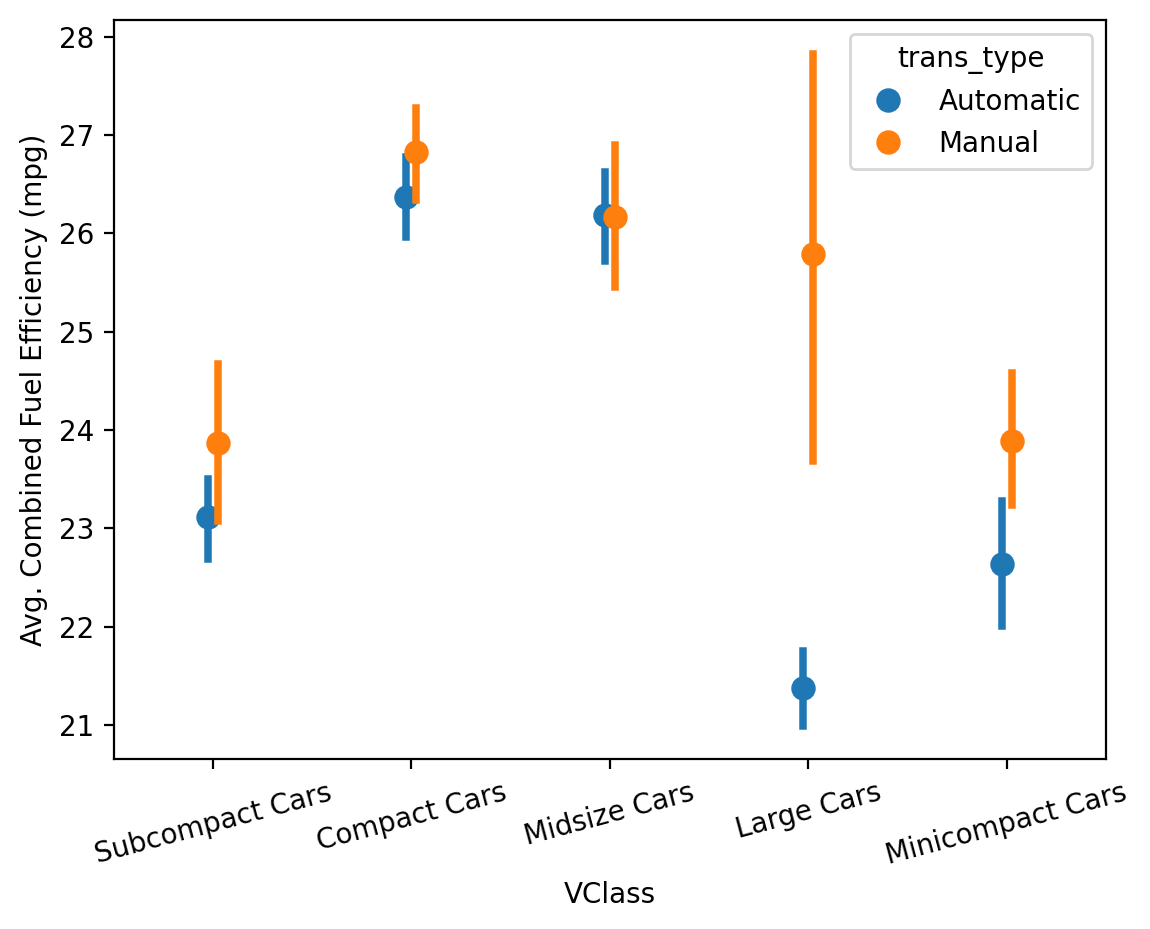

In [32]:
sns.pointplot(data=df, x='VClass', y='comb', hue='trans_type', linestyles="", dodge = True) #Can add , errorbar='sd' but i think this is more accurate
plt.xticks(rotation=15)                                                               #dodgue = True is to make sure the lines aren't plotted on top of each other
plt.ylabel('Avg. Combined Fuel Efficiency (mpg)')
;

# Plot 2: Clustered Bar Plot

''

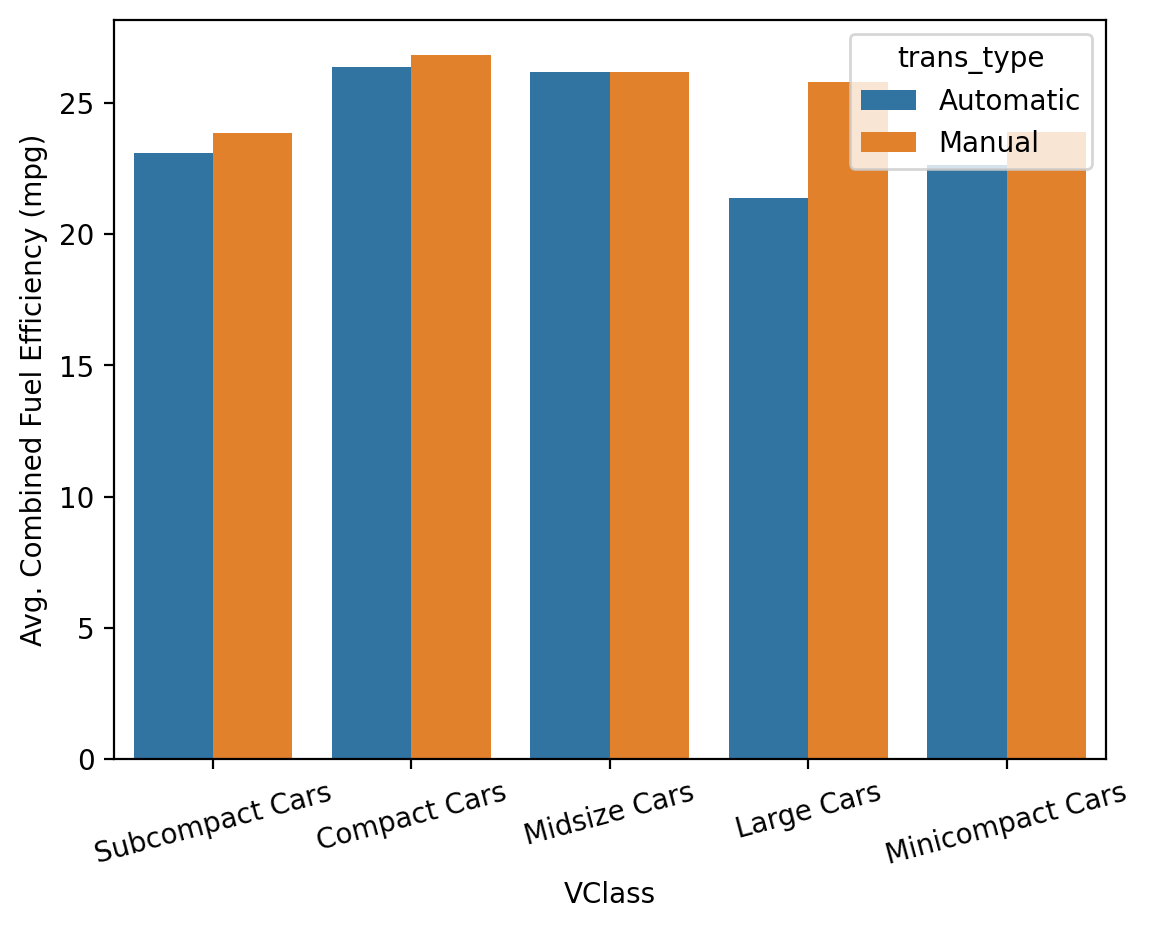

In [11]:
sns.barplot(data=df, x='VClass', y='comb', hue='trans_type',errorbar=None)
plt.xticks(rotation=15)
plt.ylabel('Avg. Combined Fuel Efficiency (mpg)')
;

# Plot 3: Clustered Box Plots

''

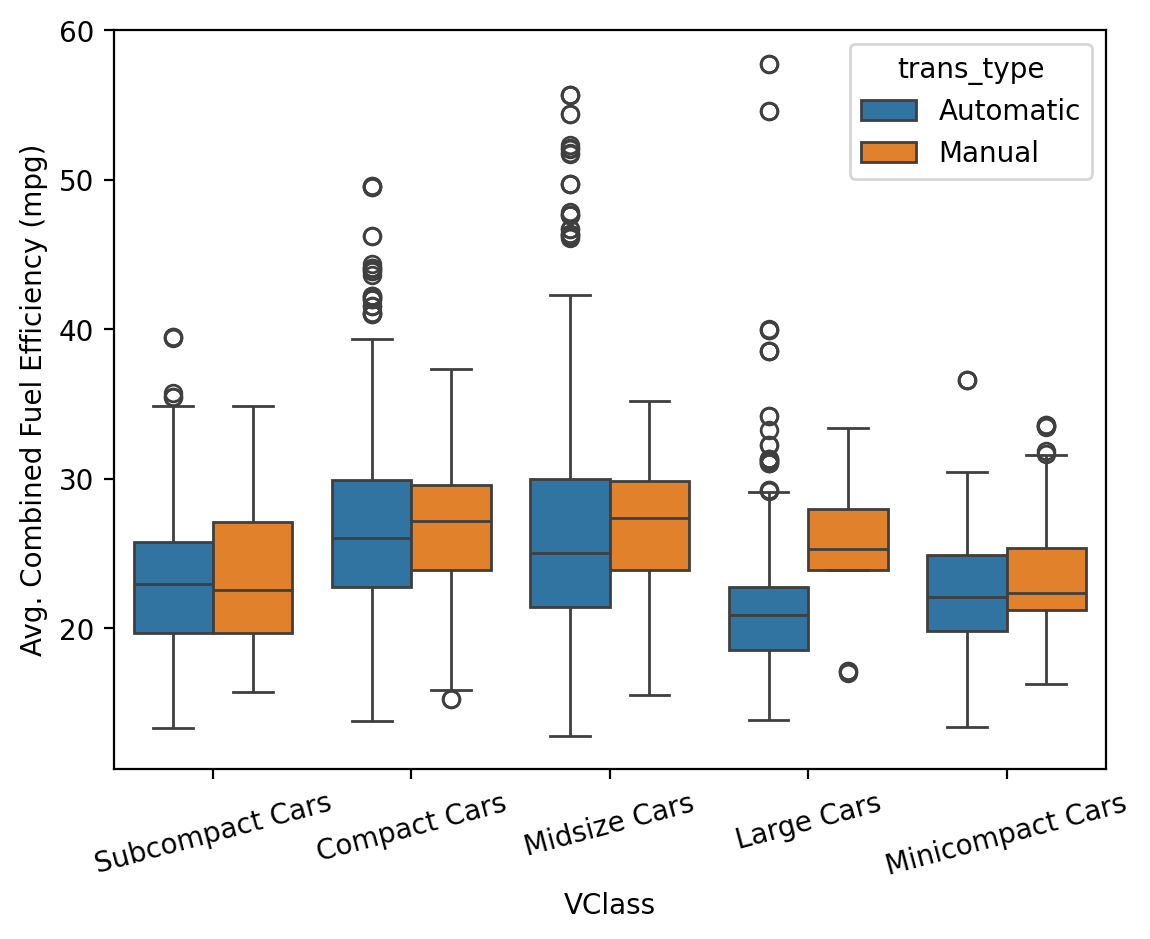

In [15]:
sns.boxplot(data=df, x='VClass', y='comb', hue='trans_type')
plt.xticks(rotation=15)
plt.ylabel('Avg. Combined Fuel Efficiency (mpg)')
;

# Plot 4: Heatmap Plot

In [16]:
bins_x = np.arange(0.6, 7+0.3, 0.3)
bins_y = np.arange(12, 58+3, 3)

In [18]:
displ_bins = pd.cut(df['displ'], bins_x, right=False, include_lowest=False, labels=False).astype(int)
comb_bins = pd.cut(df['comb'], bins_y, right=False, include_lowest=False, labels=False).astype(int)

In [19]:
n_points = df.groupby([displ_bins, comb_bins]).size()
n_points = n_points.reset_index().pivot(index='displ', columns='comb').values

In [44]:
co2_weights = df['co2'] / n_points[displ_bins, comb_bins] #This is so it displays the average for each box instead of the sum

''

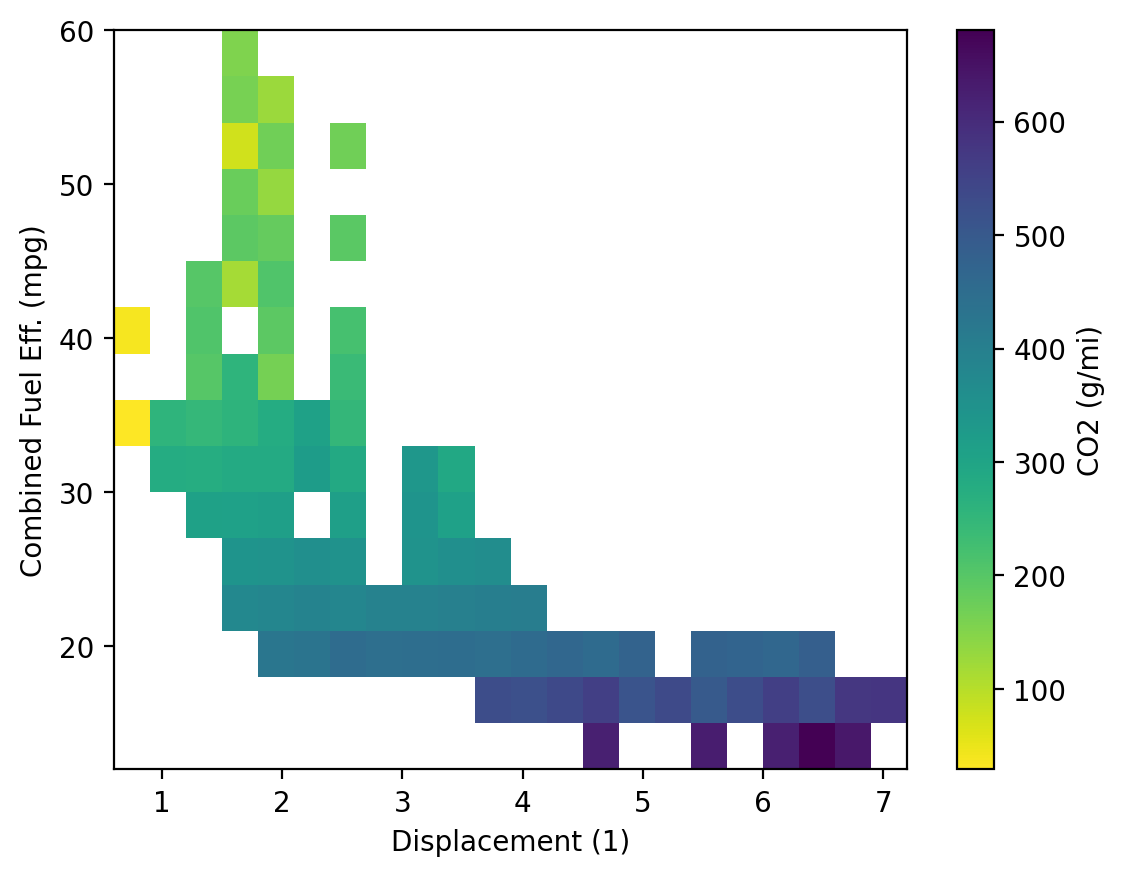

In [45]:
plt.hist2d(data=df, x='displ', y='comb', cmin=0.5, cmap='viridis_r', bins=[bins_x, bins_y], weights=co2_weights)
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)')
plt.colorbar(label='CO2 (g/mi)')

;

# Another Heat Map

''

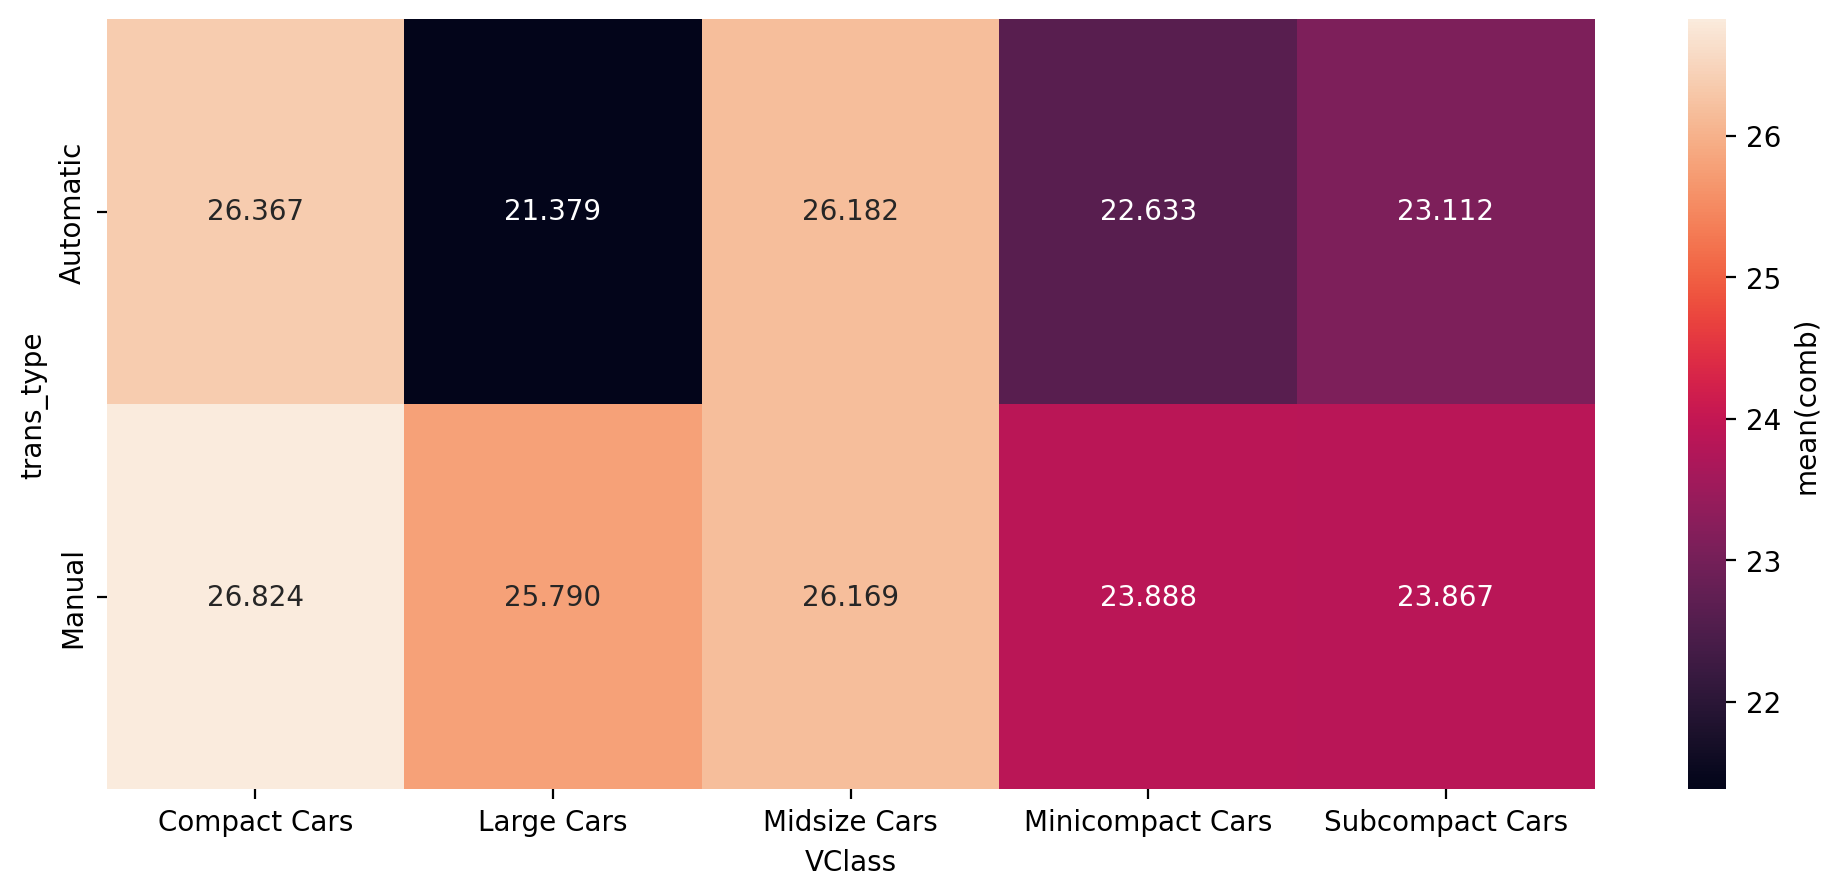

In [30]:
cat_means = df.groupby(['VClass', 'trans_type']).mean(numeric_only=True)['comb']
cat_means = cat_means.reset_index(name='num_var_avg')
cat_means = cat_means.pivot(index='trans_type', columns='VClass',
                            values='num_var_avg')

plt.figure(figsize=(12,5))
sns.heatmap(cat_means, annot=True, fmt='.3f',
           cbar_kws = {'label' : 'mean(comb)'})


;

# Frequency Polygons line plot

''

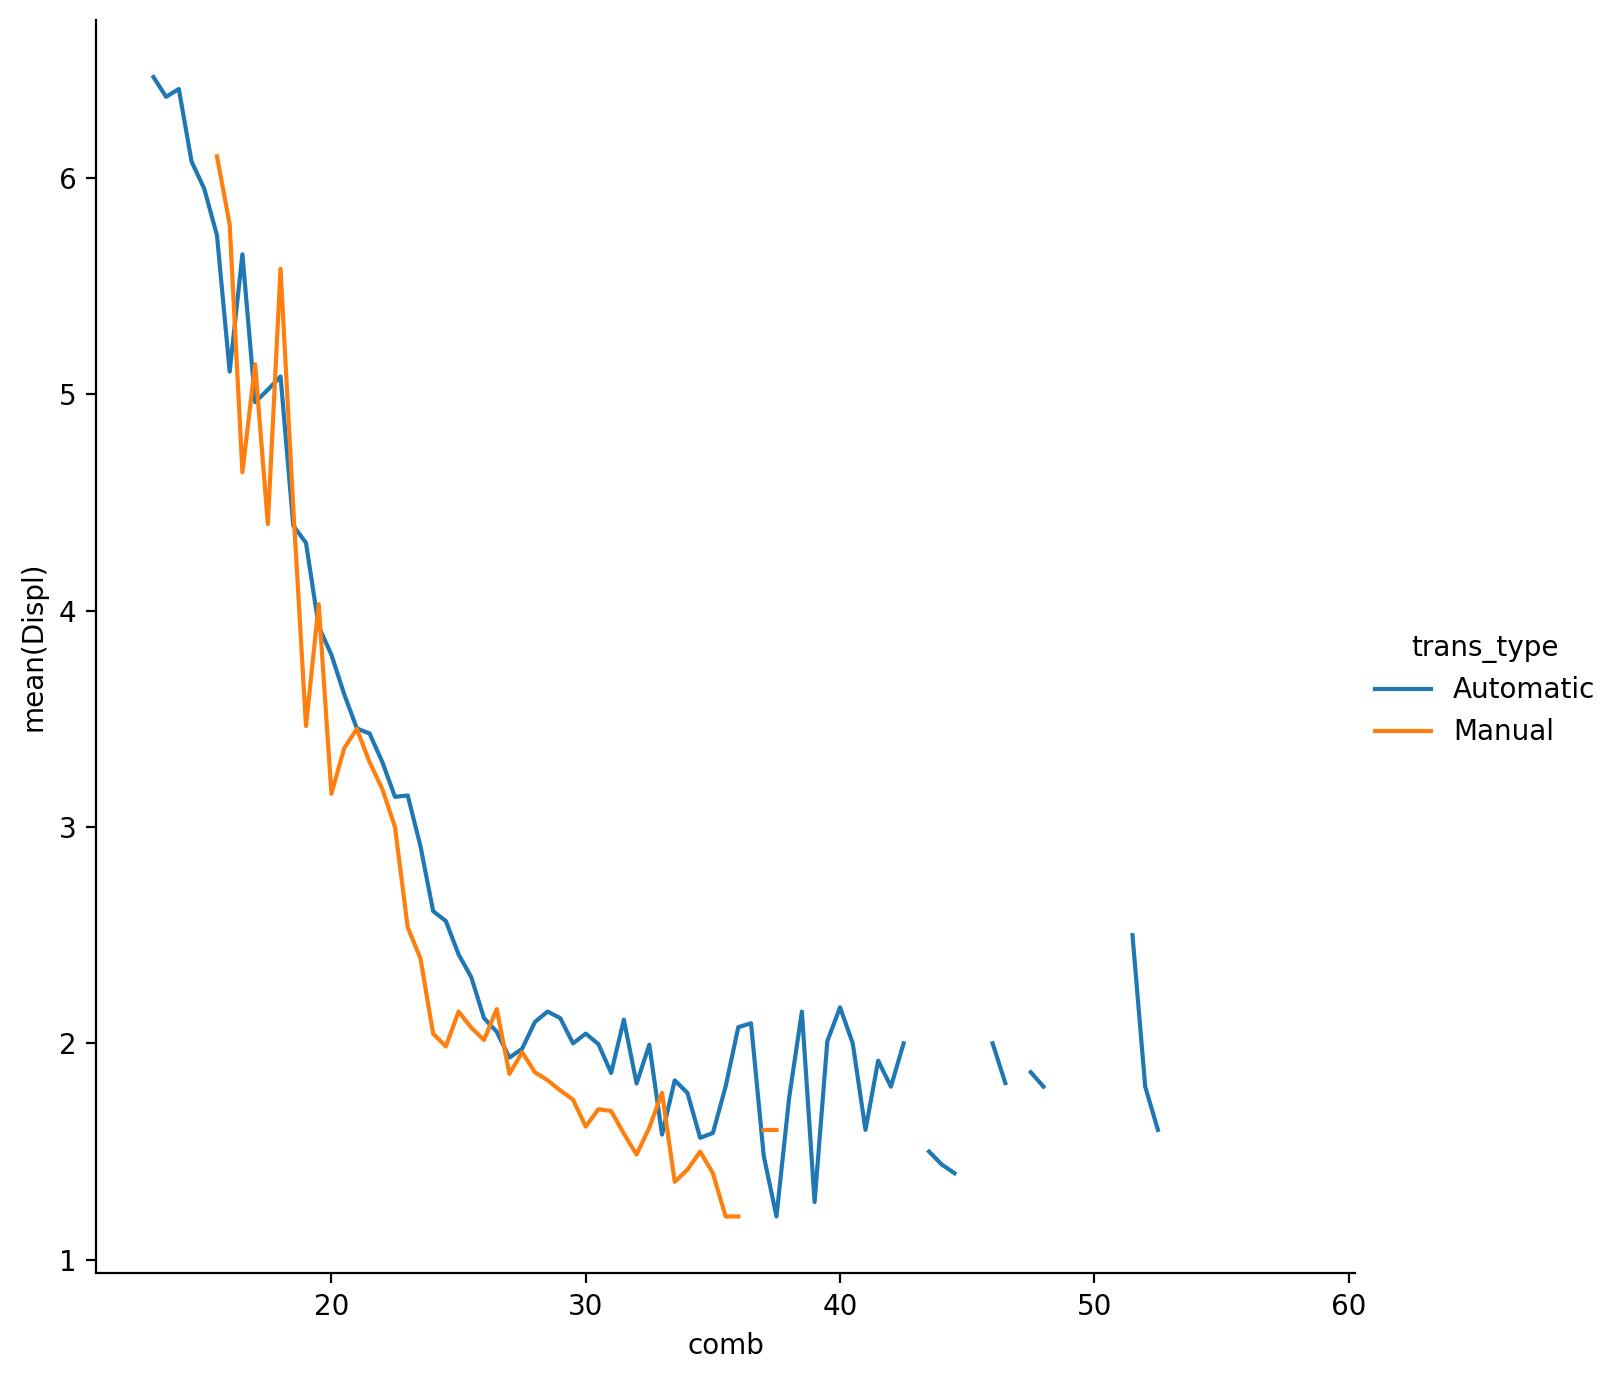

In [40]:
def mean_poly(x, y, bins = 10, **kwargs):
    """ Custom adapted line plot code. """
    # set bin edges if none or int specified
    if type(bins) == int:
        bins = np.linspace(x.min(), x.max(), bins+1)
    bin_centers = (bin_edges[1:] + bin_edges[:-1]) / 2

    # compute counts
    data_bins = pd.cut(x, bins, right=False,
                       include_lowest=True)
    means = y.groupby(data_bins, observed=False).mean()

    # create plot
    plt.errorbar(x=bin_centers, y=means, **kwargs)

bin_edges = np.arange(0.25, df['comb'].max()+0.5, 0.5)
g = sns.FacetGrid(data=df, hue='trans_type', height=7)
g.map(mean_poly, "comb", "displ", bins=bin_edges)
g.set_ylabels('mean(Displ)')
g.add_legend()

;